<img src="https://raw.githubusercontent.com/Harmonize-Brazil/code-gallery/main/img/harmonize_logo.png" align="right" width="64"/>

# <span style="color:#336699">Drone data access using the BDC-STAC service</span>
<hr style="border:2px solid #0077b9;">


<br/>

<div style="text-align: center;font-size: 90%;">
    Marcos L. Rodrigues<sup><img src="https://orcid.filecamp.com/static/thumbs/folders/qLJ1tuei4m6ugC3g.png" width="16"/><a href="https://orcid.org/0000-0002-9199-6928"> https://orcid.org/0000-0002-9199-6928</a></sup>
    <br/><br/>
    Earth Observation and Geoinformatics Division, National Institute for Space Research (INPE)
    <br/>
    Avenida dos Astronautas, 1758, Jardim da Granja, São José dos Campos, SP 12227-010, Brazil
    <br/><br/>
    Contact: <a href="mailto:marcos.rodrigues@inpe.br">marcos.rodrigues@inpe.br</a>
    <br/><br/>
    Last Update: May 30, 2025
</div>

<br/>

<div style="text-align: justify;  margin-left: 25%; margin-right: 25%;">
<b>Abstract.</b> This Jupyter Notebook gives an overview of how to use the BDC-STAC service implementation to discover and access the drone data products from the Earth Observation Data Cubes tuned for Health Response Systems (EODCtHRS), a <a href="https://harmonize-tools.org" target="_blank">HARMONIZE project</a> component. This notebook was adapted from <a href="https://github.com/brazil-data-cube/code-gallery/blob/master/jupyter/Python/stac/stac-introduction.ipynb" target="_blank">Introduction to the SpatioTemporal Asset Catalog (STAC)</a> available at Github code gallery of the <a href="https://data.inpe.br/bdc/web" target="_blank">Brazil Data Cube (BDC)</a> project.
</div>
</div>

<img src="https://data.inpe.br/bdc/web/wp-content/uploads/2021/12/bdc-stac-catalog-1-1.png" align="right" width="80"/>

# Introduction
<hr style="border:1px solid #0077b9;">

The [**S**patio**T**emporal **A**sset **C**atalog (STAC)](https://stacspec.org/) is a specification created through several organizations' collaboration to increase satellite image search interoperability. The BDC project implements this standardized API specification (<b>BDC-STAC Service</b>) to make available the image and data cube collections produced in the project. We use this service to support the discovery and access of the HARMONIZE data collections.

The STAC API is a dynamic version of a STAC. It returns STAC Catalog, Collection, Item objects through various endpoints.

<center><b>URL for HARMONIZE STAC:</b></center>

  
> Current: [https://brazildatacube.dpi.inpe.br/harmonize/dev/stac/v1](https://brazildatacube.dpi.inpe.br/harmonize/dev/stac/v1)

> After migration: [https://geolab.inpe.br/bdc/harmonize/stac/v1](https://geolab.inpe.br/bdc/harmonize/stac/v1)


The diagram below contains the most important concepts behind the STAC data model:

<center>
<img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/stac/stac-concept.png" width="480" />
<br/>
<b>Figure 1</b> - STAC model.
</center>

The description of the concepts below are adapted from the [STAC Specification](https://github.com/radiantearth/stac-spec):

- **Item**: a `STAC Item` is the atomic unit of metadata in STAC, providing links to the actual `assets` (including thumbnails) that they represent. It is a `GeoJSON Feature` with additional fields for things like time, links to related entities and mainly to the assets. According to the specification, this is the atomic unit that describes the data to be discovered in a `STAC Catalog` or `Collection`.

- **Asset**: a `spatiotemporal asset` is any file that represents information about the Earth captured in a certain space and time.


- **Catalog**: provides a structure to link various `STAC Items` together or even to other `STAC Catalogs` or `Collections`.


- **Collection:** is a specialization of the `Catalog` that allows additional information about a spatio-temporal collection of data.









# STAC Client API
<hr style="border:1px solid #0077b9;">

For running the examples in this Jupyter Notebook you will need to install the [pystac-client](https://pystac-client.readthedocs.io/en/latest/). To install it from PyPI using `pip`, use the following commands:

In [5]:
# We already have these libraries installed using the Geospatial kernel from BDC-Lab!

try:
    import sklearn    
except ImportError:
    !pip3 install scikit-learn

try:
    import pystac_client
except ImportError:
    !pip3 install pystac-client
    
print('scikit-learn:',sklearn.__version__)
print('pystac_client:',pystac_client.__version__)

scikit-learn: 1.6.1
pystac_client: 0.8.5


Installing additional libraries for processing and visualization:

In [8]:
# We already have these libraries installed using the Geospatial kernel from BDC-Lab!
import importlib

for module in ['rasterio','shapely','matplotlib','tqdm','folium']:
    try:
        importlib.import_module(module)
    except ImportError:
        !pip3 install module

In order to access the funcionalities of the client API, you should import the `stac` package, as follows:

In [1]:
import pystac_client

After that, you can check the installed `stac` package version:

Then, create a `STAC` object attached to the HARMONIZE instance of BDC-STAC service:

In [9]:
service = pystac_client.Client.open('https://brazildatacube.dpi.inpe.br/harmonize/dev/stac/v1/')

# Listing Drone Data Available
<hr style="border:1px solid #0077b9;">

Using the STAC object, it is possible to list all image and data cube collections available from the service. However, here we have used a keyword (`FlightHeight`) to retrieve only collections related to drone data:

In [24]:
for collection in service.get_collections():
    print(collection)
    # if "FlightHeight" in collection.id: #keyword for collections from drone data
    #     print(collection)

<CollectionClient id=dengue_mortality_northeast_mun_year-1>
<CollectionClient id=temp_max_no_mun_epiweek_cptec-1>
<CollectionClient id=chikungunya_cases_northeast_mun_year-1>
<CollectionClient id=prec_mean_ne_mun_epiweek-1>
<CollectionClient id=anomaly_cdays_temp_max_no_mun_month-1>
<CollectionClient id=temp_max_ne_mun_epiweek-1>
<CollectionClient id=temp_max_no_mun_epiweek-1>
<CollectionClient id=Phantom3Advanced_FlightHeight120m_Mosaic-1>
<CollectionClient id=anomaly_cdays_temp_max_ne_mun_epiweek-1>
<CollectionClient id=Phantom3Advanced_FlightHeight120m-1>
<CollectionClient id=anomaly_cdays_temp_max_ne_mun_month-1>
<CollectionClient id=temp_mean_ne_mun_epiweek-1>
<CollectionClient id=temp_mean_no_mun_epiweek-1>
<CollectionClient id=temp_min_ne_mun_epiweek-1>
<CollectionClient id=dengue_mortality_north_mun_week-1>
<CollectionClient id=prec_max_no_mun_month-1>
<CollectionClient id=prec_min_no_mun_month-1>
<CollectionClient id=temp_min_no_mun_epiweek-1>
<CollectionClient id=temp_max_NE_

# Retrieving the Metadata of a Collection
<hr style="border:1px solid #0077b9;">

The `collection` object associated as a result of the  `get_collections` method has information about a given image or data cube collection identified by its name. In this example, we are retrieving information about the Mavic 3M RGB images collection, Mavic3M_FlightHeight120m-1:

In [17]:
collection = service.get_collection('Mavic3M_FlightHeight120m-1')
collection

<CollectionClient id=Mavic3M_FlightHeight120m-1>

<img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/stac/stac-item.png?raw=true" align="right" width="300"/>

# Retrieving Items
<hr style="border:1px solid #0077b9;">

The `get_items` method returns the items of a given collection:

In [18]:
collection_items = collection.get_items()
collection_items #generator object can be used to loop over items from the collection

<generator object CollectionClient.get_items at 0x7fc434519cc0>

Visualization of a Region Of Interest (ROI) defined to filter items:

In [19]:
import folium
from shapely.geometry import Polygon

bbox = [-49.5171,-2.5970,-49.4907,-2.5669] #define ROI bounding box

roi_area = Polygon([(bbox[0],bbox[1]),
                    (bbox[0],bbox[3]),
                    (bbox[2],bbox[3]),
                    (bbox[2],bbox[1])])


# Create a folium map centered around the geographic area of interest
folium_map = folium.Map(location=[roi_area.centroid.y, roi_area.centroid.x], zoom_start=14,
                        control_scale=True, zoom_control=False)

folium.Rectangle(
    bounds=[[bbox[1],bbox[0]],[bbox[3],bbox[2]]],
    color="blue",
    weight=2,
    fill=True,
    fill_color="blue",
    fill_opacity=0.2
).add_to(folium_map)

folium_map

In order to support filtering rules through the specification of a rectangle (`bbox`) or a date and time (`datatime`) criterias, use the `Client.search(**kwargs)`. There are other options available, for example, using spatial intersects of a GeoJSON Geometry. Please see the documentation available at https://api.stacspec.org/v1.0.0/item-search.

In [22]:
item_search = service.search(bbox=bbox,
                             datetime='2023-11-07T20:00:00Z/2023-11-07T20:50:00Z', #start and end time of Bairro Novo Flight
                             collections=['Mavic3M_FlightHeight120m-1'])
item_search

The method `.search(**kwargs)` returns a `ItemSearch` representation which has handy methods to identify the matched results. For example, to check the number of items matched, use `.matched()`:

In [21]:
item_search.matched()

628

In [23]:
item_search = service.search(bbox=bbox,
                             datetime='2023-11-07/2023-11-07', 
                             collections=['Mavic3M_FlightHeight120m-1'])
item_search.matched()

1013

In [26]:
item_search = service.search(bbox=bbox,
                             datetime='2023-11-07/2023-11-07')
item_search.matched()

1055

To iterate over the matched result, use `.items()` to traverse the list of items:

In [27]:
for item in item_search.items():
    print(item)
    break #remove break to view all items

<Item id=Mavic3M_120m_Mocajuba_BairroNovo_20231107204953>


<img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/stac/stac-asset.png?raw=true" align="right" width="300"/>

# Assets
<hr style="border:1px solid #0077b9;">

The assets with the links to the images, thumbnails or specific metadata files, can be accessed through the property `assets` (from a given item):

In [15]:
assets = item.assets

Then, from the assets it is possible to traverse or access individual elements:

In [16]:
for k in assets.keys():
    print(k)

file
thumbnail


The metadata related to the Mavic 3M RGB image is available under the dictionary key `file`:

In [17]:
rgb_asset = assets['file']
rgb_asset

<Asset href=https://brazildatacube.dpi.inpe.br/harmonize/dev/data/Mavic3M_FlightHeight120m/2023/11/Mocajuba_BairroNovo_20231107T204953_RGB.tif>

To iterate in the item's assets, use the following pattern:

In [18]:
for asset in assets.values():
    print(asset)

<Asset href=https://brazildatacube.dpi.inpe.br/harmonize/dev/data/Mavic3M_FlightHeight120m/2023/11/Mocajuba_BairroNovo_20231107T204953_RGB.tif>
<Asset href=https://brazildatacube.dpi.inpe.br/harmonize/dev/data/Mavic3M_FlightHeight120m/2023/11/Mocajuba_BairroNovo_20231107T204953_RGB.png>


# Using RasterIO and NumPy
<hr style="border:1px solid #0077b9;">

The `rasterio` library can be used to read image files from STAC service on-the-fly and then to create `NumPy` arrays. The `read` method of an `Item` can be used to perform the reading and array creation:

In [22]:
import rasterio
from rasterio.plot import show
import numpy

In [20]:
with rasterio.open(assets['file'].href) as rgb_ds:
    rgb = rgb_ds.read()
    rgb_transform = rgb_ds.transform 

<div style="text-align: justify;  margin-left: 15%; margin-right: 15%; border-style: solid; border-color: #0077b9; border-width: 1px; padding: 5px;">
    <b>Note:</b> If there are errors because of your pyproj version, you can run the code below as specified in <a  href="https://rasterio.readthedocs.io/en/latest/faq.html#why-can-t-rasterio-find-proj-db-rasterio-from-pypi-versions-1-2-0" target="_blank">rasterio documentation</a> and try again:

       import os
       del os.environ['PROJ_LIB']
</div>

The `rasterio` also provides `rasterio.plot.show()` to perform common tasks such as displaying multi-band images as RGB and labeling the axes with proper geo-referenced extents. Note that when passing arrays, you can pass in a transform in order to get extent labels.

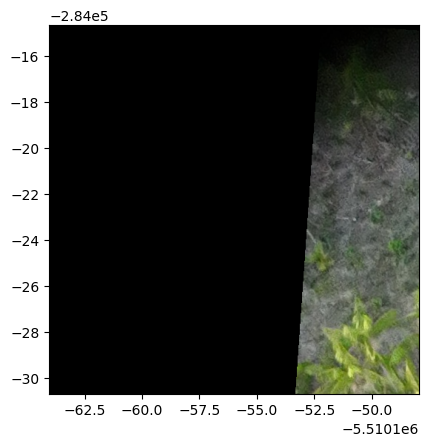

<Axes: >

In [33]:
rgb[rgb==0] = 255
rasterio.plot.show(rgb, transform=rgb_transform)

The next cell code import the `Window` class from the `rasterio` library in order to retrieve a subset of an image and then create an array:

In [24]:
from rasterio.windows import Window

We have prepared a basic function `read()`to read raster windows as [`numpy.ma.masked_array`](https://numpy.org/doc/stable/reference/maskedarray.generic.html).

In [25]:
def read(uri: str, window: Window, masked: bool = True):
    """Read raster window as numpy.ma.masked_array."""
    with rasterio.open(uri) as ds:
        return ds.read(window=window, masked=masked)

We can specify a subset of the image file (window or chunck) to be read. Let's read a range that starts on pixel (0, 0) with 500 x 500 and column 0 to column 500, for the RGB image:

In [26]:
rgb = read(assets['file'].href, window=Window(0, 0, 500, 500)) # Window(col_off, row_off, width, height)

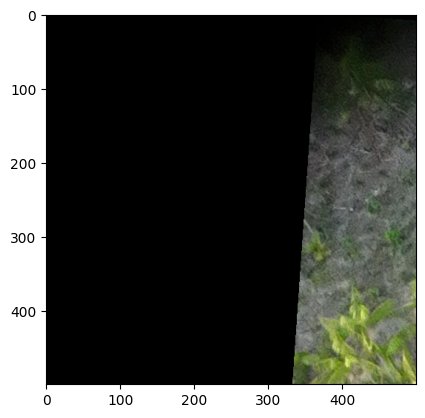

In [28]:
rasterio.plot.show(rgb);

You can also load using coordinates:

In [29]:
from rasterio.windows import from_bounds

In [30]:
with rasterio.open(assets['file'].href) as src:
    rst = src.read(window=from_bounds(-5510164.044, -284030.73, -5510147.95,  -284014.621, src.transform))
print(rst.shape)

(3, 501, 500)


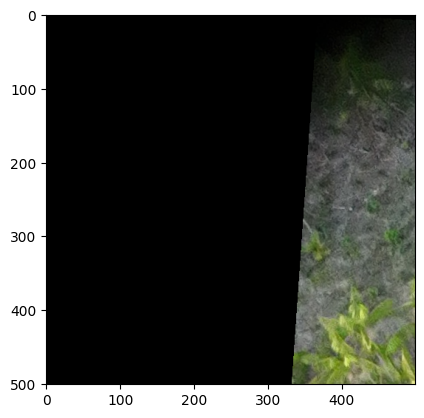

In [32]:
rasterio.plot.show(rst);

# Using Matplotlib to Visualize Images Composition and NDVI
<hr style="border:1px solid #0077b9;">


The Mavic 3 Multispectral has two forms of sight. It combines an RGB camera with a multispectral camera to scan and analyze crop growth with total clarity. Agricultural production management requires precision and data, and Mavic 3M delivers both.

Source: [DJI Mavic 3m](https://ag.dji.com/mavic-3-m?backup_page=index)


Besides RGB images, we have also produced multispectral images from (NIR, Red Edge, Red and Green) bands and NDVI with Mavic 3M data. All these products are available at the STAC service:

In [60]:
# Get Mavic 3M multispectral data collection:
collection = service.get_collection('Mavic3M_FlightHeight120m_MS-1')
collection.description

'Collection of images from drone DJI Mavic 3M based on Multispectral Lens (NIR, RE, R and G) and NDVI projected using GPS center coordinates, flight height (120 meters) and flight yaw degree information.'

In [69]:
search = service.search(collections=["Mavic3M_FlightHeight120m_MS-1"])
collection_items = search.item_collection()

for item in collection_items:
    print(item)

<Item id=Mavic3M_120m_MS_Mocajuba_BairroNovo_20231107204953>
<Item id=Mavic3M_120m_MS_Mocajuba_BairroNovo_20231107204907>
<Item id=Mavic3M_120m_MS_Mocajuba_BairroNovo_20231107203554>
<Item id=Mavic3M_120m_MS_Mocajuba_BairroNovo_20231107203552>
<Item id=Mavic3M_120m_MS_Mocajuba_BairroNovo_20231107203120>
<Item id=Mavic3M_120m_MS_Mocajuba_BairroNovo_20231107202921>
<Item id=Mavic3M_120m_MS_Mocajuba_BairroNovo_20231107202919>
<Item id=Mavic3M_120m_MS_Mocajuba_BairroNovo_20231107202917>
<Item id=Mavic3M_120m_MS_Mocajuba_BairroNovo_20231107202915>
<Item id=Mavic3M_120m_MS_Mocajuba_BairroNovo_20231107202757>


In [39]:
collection_item = collection.get_item('Mavic3M_120m_MS_Mocajuba_BairroNovo_20231107202757')

In [40]:
collection_item.assets 

{'NIR': <Asset href=https://brazildatacube.dpi.inpe.br/harmonize/dev/data/Mavic3M_FlightHeight120m_MS/2023/11/Mocajuba_BairroNovo_20231107T202757_MS_NIR.tif>,
 'RED': <Asset href=https://brazildatacube.dpi.inpe.br/harmonize/dev/data/Mavic3M_FlightHeight120m_MS/2023/11/Mocajuba_BairroNovo_20231107T202757_MS_R.tif>,
 'NDVI': <Asset href=https://brazildatacube.dpi.inpe.br/harmonize/dev/data/Mavic3M_FlightHeight120m_MS/2023/11/Mocajuba_BairroNovo_20231107T202757_MS_NDVI.tif>,
 'GREEN': <Asset href=https://brazildatacube.dpi.inpe.br/harmonize/dev/data/Mavic3M_FlightHeight120m_MS/2023/11/Mocajuba_BairroNovo_20231107T202757_MS_G.tif>,
 'RED EDGE': <Asset href=https://brazildatacube.dpi.inpe.br/harmonize/dev/data/Mavic3M_FlightHeight120m_MS/2023/11/Mocajuba_BairroNovo_20231107T202757_MS_RE.tif>,
 'thumbnail': <Asset href=https://brazildatacube.dpi.inpe.br/harmonize/dev/data/Mavic3M_FlightHeight120m_MS/2023/11/Mocajuba_BairroNovo_20231107T202757_MS.png>}

### Overview of image based on thumbnail
<img src="https://brazildatacube.dpi.inpe.br/harmonize/dev/data/Mavic3M_FlightHeight120m_MS/2023/11/Mocajuba_BairroNovo_20231107T202757_MS.png">

We can specify a subset of the image file (window or chunck) to be read. Let's read a range that starts on pixel (500, 500) with 500 x 500 and column 500 to column 1000, for the spectral bands red, nir and green:



In [41]:
# Using numpy squeze to remove axes of length one:
red = numpy.squeeze(read(collection_item.assets['RED'].href, window=Window(500, 500, 500, 500)), axis=0) # Window(col_off, row_off, width, height)
nir = numpy.squeeze(read(collection_item.assets['NIR'].href, window=Window(500, 500, 500, 500)), axis=0)
green = numpy.squeeze(read(collection_item.assets['GREEN'].href, window=Window(500, 500, 500, 500)), axis=0)

The `Matplotlib` can be used to plot the arrays read in the last section:

In [42]:
%matplotlib inline
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'Green band')

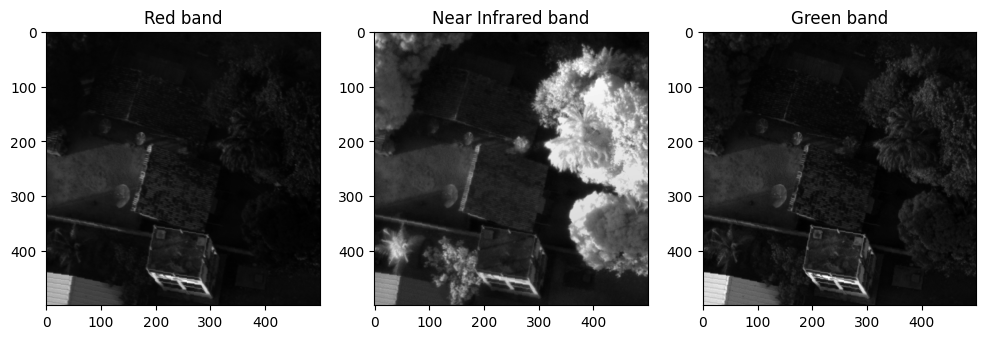

In [44]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12, 4))
ax1.imshow(red, cmap='gray');
ax1.set_title('Red band');
ax2.imshow(nir, cmap='gray');
ax2.set_title('Near Infrared band');
ax3.imshow(green, cmap='gray');
ax3.set_title('Green band');

Using `Numpy` we can stack the previous arrays and use `Matplotlib` to plot a color image, but first we need to normalize their values:

In [45]:
def normalize(array):
    """Normalizes numpy arrays into scale 0.0 - 1.0"""
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))

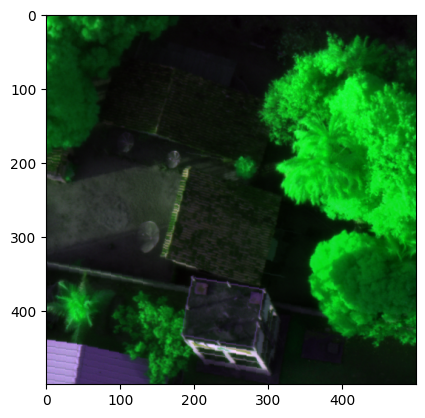

In [46]:
rgb = numpy.dstack((normalize(red), normalize(nir), normalize(green)))
plt.imshow(rgb);

### Ploting NDVI

In [47]:
asset = collection_item.assets['NDVI']

Using `extra_fields` from asset, we can see information needed to plot properly the vegetation indice raster. For example, `scale`, `nodata`, etc.:

In [48]:
asset.extra_fields

{'created': '2024-11-14T00:04:25',
 'updated': '2024-11-14T00:04:25',
 'bdc:size': 8913954,
 'bdc:chunk_size': {'x': 0, 'y': 0},
 'bdc:raster_size': {'x': 2120, 'y': 2721},
 'checksum:multihash': '',
 'eo:bands': [{'name': 'NDVI',
   'common_name': 'ndvi',
   'description': 'Normalized Difference Vegetation Index',
   'min': -10000.0,
   'max': 10000.0,
   'nodata': -9999.0,
   'scale': 0.0001,
   'scale_add': None,
   'data_type': 'int16',
   'resolution_x': 0.055470216760466,
   'resolution_y': 0.055470216760466}]}

In [49]:
with rasterio.open(asset.href) as raster_ds:
    ndvi = raster_ds.read(1)
    left, bottom, right, top = raster_ds.bounds

In [50]:
# Mask nodata and apply scale to get original values of NDVI:
nodata = asset.extra_fields['eo:bands'][0]['nodata']
scale = asset.extra_fields['eo:bands'][0]['scale']
ndvi = numpy.ma.masked_values(ndvi, nodata) * scale

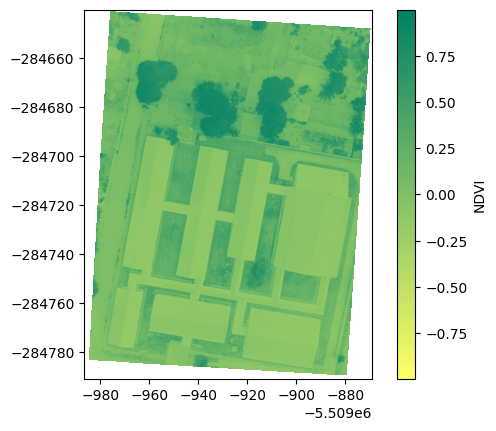

In [55]:
%matplotlib inline

im1 = plt.imshow(ndvi, extent=(left, right, bottom, top),cmap='summer_r')
plt.colorbar(im1, label='NDVI');


# Retrieving Image Files
<hr style="border:1px solid #0077b9;">

The file related to an asset can be retrieved through the `download` method. The cell code below shows how to download the image file associated to the asset into a folder named `img`:

In [56]:
import os
from urllib.parse import urlparse

import requests
from pystac import Asset
from tqdm import tqdm

def download(asset: Asset, directory: str = None, chunk_size: int = 1024 * 16, **request_options) -> str:
    """Smart download STAC Item asset.

    This method uses a checksum validation and a progress bar to monitor download status.
    """
    if directory is None:
        directory = ''

    response = requests.get(asset.href, stream=True, **request_options)
    output_file = os.path.join(directory, urlparse(asset.href)[2].split('/')[-1])
    os.makedirs(directory, exist_ok=True)
    total_bytes = int(response.headers.get('content-length', 0))
    with tqdm.wrapattr(open(output_file, 'wb'), 'write', miniters=1, total=total_bytes, desc=os.path.basename(output_file)) as fout:
        for chunk in response.iter_content(chunk_size=chunk_size):
            fout.write(chunk)

In [59]:
download(collection_item.assets['NDVI'], 'images')

Mocajuba_BairroNovo_20231107T202757_MS_NDVI.tif: 100%|██████████████████████████████| 8.50M/8.50M [00:13<00:00, 680kB/s]


In order to download all files related to an item, iterate over assets and download each one as following:

In [58]:
for asset in collection_item.assets.values():
    download(asset, 'images')

Mocajuba_BairroNovo_20231107T202757_MS_NIR.tif: 100%|███████████████████████████████| 11.3M/11.3M [00:12<00:00, 938kB/s]
Mocajuba_BairroNovo_20231107T202757_MS_R.tif: 100%|█████████████████████████████████| 10.5M/10.5M [00:13<00:00, 807kB/s]
Mocajuba_BairroNovo_20231107T202757_MS_NDVI.tif: 100%|██████████████████████████████| 8.50M/8.50M [00:13<00:00, 679kB/s]
Mocajuba_BairroNovo_20231107T202757_MS_G.tif: 100%|█████████████████████████████████| 11.3M/11.3M [00:20<00:00, 585kB/s]
Mocajuba_BairroNovo_20231107T202757_MS_RE.tif: 100%|███████████████████████████████| 11.6M/11.6M [00:11<00:00, 1.04MB/s]
Mocajuba_BairroNovo_20231107T202757_MS.png: 100%|██████████████████████████████████| 79.4k/79.4k [00:00<00:00, 3.94MB/s]


# References
<hr style="border:1px solid #0077b9;">

- [Spatio Temporal Asset Catalog Specification](https://stacspec.org/)


- [Python Client Library for STAC Service](https://pystac-client.readthedocs.io/en/latest/)

# See also the following Jupyter Notebooks
<hr style="border:1px solid #0077b9;">

* [Introduction to Earth Observation Data Cubes tuned for Health Response (EDPU)
STAC functions in Python](https://github.com/Harmonize-Brazil/code-gallery/blob/main/jupyter/Python/edpu/publish_collection.ipynb)
* [Earth Observation Data Cubes tuned for Health Response Health Indicator PRocessing (EHIPR) user manual](https://github.com/Harmonize-Brazil/code-gallery/blob/main/jupyter/Python/ehipr/spatializing_lis_indicator.ipynb)